In [6]:
import numpy as np
import cv2

In [7]:
def order_points(pts):
	# initialzie a list of coordinates that will be ordered
	# such that the first entry in the list is the top-left,
	# the second entry is the top-right, the third is the
	# bottom-right, and the fourth is the bottom-left
	rect = np.zeros((4, 2), dtype = "float32")
	# the top-left point will have the smallest sum, whereas
	# the bottom-right point will have the largest sum
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
	# now, compute the difference between the points, the
	# top-right point will have the smallest difference,
	# whereas the bottom-left will have the largest difference
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
	# return the ordered coordinates
	return rect

In [8]:
def four_point_transform(image, pts):
	# obtain a consistent order of the points and unpack them
	# individually
	rect = order_points(pts)
	(tl, tr, br, bl) = rect
	# compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	# compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	# now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left
	# order
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	# compute the perspective transform matrix and then apply it
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
	# return the warped image
	return warped

In [9]:
img = cv2.imread('Images/tilted_image.jpg')
cv2.imshow('OG',img)

error: OpenCV(4.2.0) /io/opencv/modules/highgui/src/window.cpp:651: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [2]:
from Images.transform_example import four_point_transform
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", help = "path to the image file")
ap.add_argument("-c", "--coords",
	help = "comma seperated list of source points")
args = vars(ap.parse_args())
# load the image and grab the source coordinates (i.e. the list of
# of (x, y) points)
# NOTE: using the 'eval' function is bad form, but for this example
# let's just roll with it -- in future posts I'll show you how to
# automatically determine the coordinates without pre-supplying them
image = cv2.imread(args["image"])
pts = np.array(eval(args["coords"]), dtype = "float32")
# apply the four point tranform to obtain a "birds eye view" of
# the image
warped = four_point_transform(image, pts)
# show the original and warped images
# cv2.imshow("Original", image)
# cv2.imshow("Warped", warped)
cv2.imwrite("Warped.jpg", warped)
# cv2.waitKey(0)

SyntaxError: invalid syntax (296781124.py, line 13)

In [20]:
# cv2.imread('tilted_image.jpg')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [226, 208, 167],
        [227, 208, 170],
        [229, 210, 173]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [221, 206, 160],
        [224, 208, 165],
        [227, 211, 169]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [219, 206, 160],
        [223, 210, 164],
        [226, 213, 169]],

       ...,

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]]

In [28]:
import math
import cv2
import scipy.spatial.distance
import numpy as np

img = cv2.imread('tilted_image2.jpg')
(rows,cols,_) = img.shape

#image center
u0 = (cols)/2.0
v0 = (rows)/2.0

#detected corners on the original image
p = []
p.append((67,74))
p.append((270,64))
p.append((10,344))
p.append((343,331))

#widths and heights of the projected image
w1 = scipy.spatial.distance.euclidean(p[0],p[1])
w2 = scipy.spatial.distance.euclidean(p[2],p[3])

h1 = scipy.spatial.distance.euclidean(p[0],p[2])
h2 = scipy.spatial.distance.euclidean(p[1],p[3])

w = max(w1,w2)
h = max(h1,h2)

#visible aspect ratio
ar_vis = float(w)/float(h)

#make numpy arrays and append 1 for linear algebra
m1 = np.array((p[0][0],p[0][1],1)).astype('float32')
m2 = np.array((p[1][0],p[1][1],1)).astype('float32')
m3 = np.array((p[2][0],p[2][1],1)).astype('float32')
m4 = np.array((p[3][0],p[3][1],1)).astype('float32')

#calculate the focal disrance
k2 = np.dot(np.cross(m1,m4),m3) / np.dot(np.cross(m2,m4),m3)
k3 = np.dot(np.cross(m1,m4),m2) / np.dot(np.cross(m3,m4),m2)

n2 = k2 * m2 - m1
n3 = k3 * m3 - m1

n21 = n2[0]
n22 = n2[1]
n23 = n2[2]

n31 = n3[0]
n32 = n3[1]
n33 = n3[2]

f = math.sqrt(np.abs( (1.0/(n23*n33)) * ((n21*n31 - (n21*n33 + n23*n31)*u0 + n23*n33*u0*u0) + (n22*n32 - (n22*n33+n23*n32)*v0 + n23*n33*v0*v0))))

A = np.array([[f,0,u0],[0,f,v0],[0,0,1]]).astype('float32')

At = np.transpose(A)
Ati = np.linalg.inv(At)
Ai = np.linalg.inv(A)

#calculate the real aspect ratio
ar_real = math.sqrt(np.dot(np.dot(np.dot(n2,Ati),Ai),n2)/np.dot(np.dot(np.dot(n3,Ati),Ai),n3))

if ar_real < ar_vis:
    W = int(w)
    H = int(W / ar_real)
else:
    H = int(h)
    W = int(ar_real * H)

pts1 = np.array(p).astype('float32')
pts2 = np.float32([[0,0],[W,0],[0,H],[W,H]])

#project the image with the new w/h
M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(W,H))

# plt.show('img',img)
# plt.imshow('dst',dst)
cv2.imwrite('orig2.png',img)
cv2.imwrite('proj2.png',dst)

# cv2.waitKey(0)

True

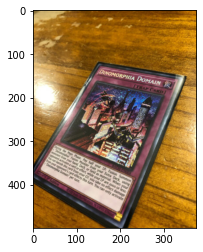

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# To open matplotlib in interactive mode
%matplotlib inline
 
# Load the image
img = cv2.imread('tilted_image2.jpg') 
 
# Create a copy of the image
img_copy = np.copy(img)
 
# Convert to RGB so as to display via matplotlib
# Using Matplotlib we can easily find the coordinates
# of the 4 points that is essential for finding the 
# transformation matrix
img_copy = cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)
 
plt.imshow(img_copy)

In [37]:
# All points are in format [cols, rows]
pt_A = [41, 2001]
pt_B = [2438, 2986]
pt_C = [3266, 371]
pt_D = [1772, 136]

# Here, I have used L2 norm. You can use L1 also.
width_AD = np.sqrt(((pt_A[0] - pt_D[0]) ** 2) + ((pt_A[1] - pt_D[1]) ** 2))
width_BC = np.sqrt(((pt_B[0] - pt_C[0]) ** 2) + ((pt_B[1] - pt_C[1]) ** 2))
maxWidth = max(int(width_AD), int(width_BC))


height_AB = np.sqrt(((pt_A[0] - pt_B[0]) ** 2) + ((pt_A[1] - pt_B[1]) ** 2))
height_CD = np.sqrt(((pt_C[0] - pt_D[0]) ** 2) + ((pt_C[1] - pt_D[1]) ** 2))
maxHeight = max(int(height_AB), int(height_CD))

In [38]:
input_pts = np.float32([pt_A, pt_B, pt_C, pt_D])
output_pts = np.float32([[0, 0],
                        [0, maxHeight - 1],
                        [maxWidth - 1, maxHeight - 1],
                        [maxWidth - 1, 0]])

In [39]:
# Compute the perspective transform M
M = cv2.getPerspectiveTransform(input_pts,output_pts)

In [40]:
out = cv2.warpPerspective(img,M,(maxWidth, maxHeight),flags=cv2.INTER_LINEAR)

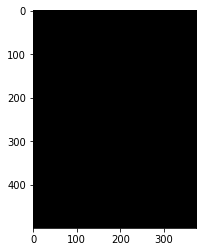

In [43]:
# Specify input and output coordinates that is used
# to calculate the transformation matrix
input_pts = np.float32([[80,1286],[3890,1253],[3890,122],[450,115]])
output_pts = np.float32([[100,100],[100,3900],[2200,3900],[2200,100]])

# Compute the perspective transform M
M = cv2.getPerspectiveTransform(input_pts,output_pts)

# Apply the perspective transformation to the image
out = cv2.warpPerspective(img,M,(img.shape[1], img.shape[0]),flags=cv2.INTER_LINEAR)

# Display the transformed image
plt.imshow(out)

In [76]:
import cv2
import imutils
import numpy as np
from skimage import exposure


#function to order points to proper rectangle
def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype="float32")

    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect


#function to transform image to four points
def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)

    # # multiply the rectangle by the original ratio
    # rect *= ratio

    (tl, tr, br, bl) = rect

    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
    return warped


#function to find two largest countours which ones are may be
#  full image and our rectangle edged object
def findLargestCountours(cntList, cntWidths):
    newCntList = []
    newCntWidths = []

    #finding 1st largest rectangle
    first_largest_cnt_pos = cntWidths.index(max(cntWidths))

    # adding it in new
    newCntList.append(cntList[first_largest_cnt_pos])
    newCntWidths.append(cntWidths[first_largest_cnt_pos])

    #removing it from old
    cntList.pop(first_largest_cnt_pos)
    cntWidths.pop(first_largest_cnt_pos)

    #finding second largest rectangle
    seccond_largest_cnt_pos = cntWidths.index(max(cntWidths))

    # adding it in new
    newCntList.append(cntList[seccond_largest_cnt_pos])
    newCntWidths.append(cntWidths[seccond_largest_cnt_pos])

    #removing it from old
    cntList.pop(seccond_largest_cnt_pos)
    cntWidths.pop(seccond_largest_cnt_pos)

    print('Old Screen Dimentions filtered', cntWidths)
    print('Screen Dimentions filtered', newCntWidths)
    return newCntList, newCntWidths


#driver function which identifieng 4 corners and doing four point transformation
def convert_object(image, screen_size = None, isDebug = False):

    # image = imutils.resize(image, height=300)
    # ratio = image.shape[0] / 300.0


    # convert the image to grayscale, blur it, and find edges
    # in the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, 11, 17, 17)  # 11  //TODO 11 FRO OFFLINE MAY NEED TO TUNE TO 5 FOR ONLINE

    gray = cv2.medianBlur(gray, 5)
    edged = cv2.Canny(gray, 30, 400)
    print('Edged')
    print(edged)
    # if isDebug  : cv2.imshow('edged', edged)
    # find contours in the edged image, keep only the largest
    # ones, and initialize our screen contour

    countours, hierarcy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) #_, 

    if isDebug : print('length of countours ', len(countours))

    imageCopy = image.copy()
    # if isDebug : cv2.imshow('drawn countours', cv2.drawContours(imageCopy, countours, -1, (0, 255, 0), 1))


    # approximate the contour
    cnts = sorted(countours, key=cv2.contourArea, reverse=True)
    screenCntList = []
    scrWidths = []
    for cnt in cnts:
        peri = cv2.arcLength(cnt, True)  # cnts[1] always rectangle O.o
        approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
        screenCnt = approx
        # print(len(approx))

        if (len(screenCnt) == 4):

            (X, Y, W, H) = cv2.boundingRect(cnt)
            # print('X Y W H', (X, Y, W, H))
            screenCntList.append(screenCnt)
            scrWidths.append(W)

        # else:
        #     print("4 points not found")

    print('Screens found :', len(screenCntList))
    print('Screen Dimentions', scrWidths)

    screenCntList, scrWidths = findLargestCountours(screenCntList, scrWidths)

    if not len(screenCntList) >=2: #there is no rectangle found
        print(1)
        return None
    # elif scrWidths[0] != scrWidths[1]: #mismatch in rect
    #     print(2)
    #     return None

    # if isDebug :   
    #     cv2.imshow(" Screen", cv2.drawContours(image.copy(), [screenCntList[0]], -1, (0, 255, 0), 3))

    # now that we have our screen contour, we need to determine
    # the top-left, top-right, bottom-right, and bottom-left
    # points so that we can later warp the image -- we'll start
    # by reshaping our contour to be our finals and initializing
    # our output rectangle in top-left, top-right, bottom-right,
    # and bottom-left order
    pts = screenCntList[0].reshape(4, 2)
    print('Found bill rectagle at ', pts)
    rect = order_points(pts)
    print(rect)

    # apply the four point tranform to obtain a "birds eye view" of
    # the image
    warped = four_point_transform(image, pts)

    # convert the warped image to grayscale and then adjust
    # the intensity of the pixels to have minimum and maximum
    # values of 0 and 255, respectively
    warp = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    warp = exposure.rescale_intensity(warp, out_range=(0, 255))

    # show the original and warped images
    if(isDebug):
        plt.imshow(warp)
        return 
        cv2.imwrite('NEWIMAGE.jpg', warp)
        cv2.imshow("Original", image)
        cv2.imshow("warp", warp)
        cv2.waitKey(0)

    if(screen_size != None):
        return cv2.cvtColor(cv2.resize(warp, screen_size), cv2.COLOR_GRAY2RGB)
    else:
        return cv2.cvtColor(warp, cv2.COLOR_GRAY2RGB)


# convert_object(cv2.imread('Sample3/Original.png'), isDebug=True)

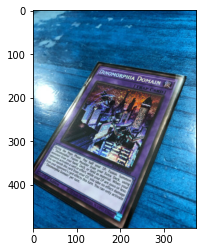

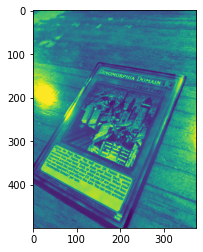

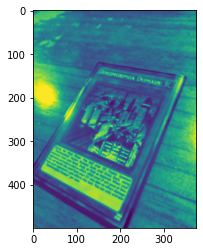

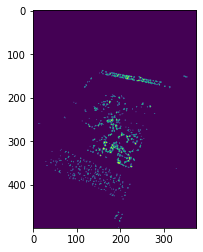

In [90]:
img2 = cv2.imread('tilted_image2.jpg')
plt.imshow(img2)
plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()
bi = cv2.bilateralFilter(gray, 5, 75, 75)
plt.imshow(bi)
plt.show()
dst = cv2.cornerHarris(bi, 2, 3, 0.04)
mask = np.zeros_like(gray)
mask[dst>0.01*dst.max()] = 255
plt.imshow(mask)
plt.show()

Edged
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
length of countours  108
Screens found : 7
Screen Dimentions [116, 192, 52, 3, 3, 3, 3]
Old Screen Dimentions filtered [52, 3, 3, 3, 3]
Screen Dimentions filtered [192, 116]
Found bill rectagle at  [[135 139]
 [152 118]
 [326 148]
 [152 118]]
[[152. 118.]
 [326. 148.]
 [326. 148.]
 [135. 139.]]


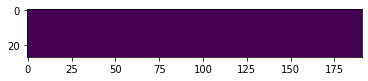

In [83]:
a = convert_object(img2, isDebug=True)

In [94]:
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
 
# Setting plot size to 15, 15
plt.figure(figsize=(15, 15))
 
# Sample Image of scikit-image package
# img2 = data.coffee()
gray_coffee = rgb2gray(img2)

<Figure size 1080x1080 with 0 Axes>

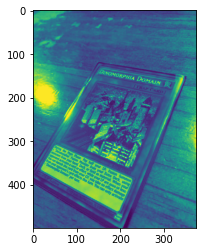

In [95]:
plt.imshow(gray_coffee)

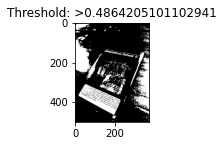

In [97]:
threshold = filters.threshold_otsu(gray_coffee)

binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))
 
# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")

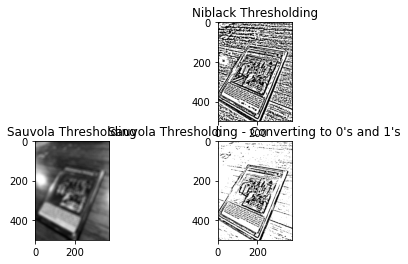

In [98]:
# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")
 
# Computing Ni black's local pixel
# threshold values for every pixel
threshold = filters.threshold_niblack(gray_coffee)
 
# Computing binarized values using the obtained
# threshold
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,2)
plt.title("Niblack Thresholding")
 
# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")
 
# Computing Sauvola's local pixel threshold
# values for every pixel - Not Binarized
threshold = filters.threshold_sauvola(gray_coffee)
plt.subplot(2,2,3)
plt.title("Sauvola Thresholding")
 
# Displaying the local threshold values
plt.imshow(threshold, cmap = "gray")
 
# Computing Sauvola's local pixel
# threshold values for every pixel - Binarized
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,4)
plt.title("Sauvola Thresholding - Converting to 0's and 1's")
 
# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.segmentation import slic

from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage.color import label2rgb


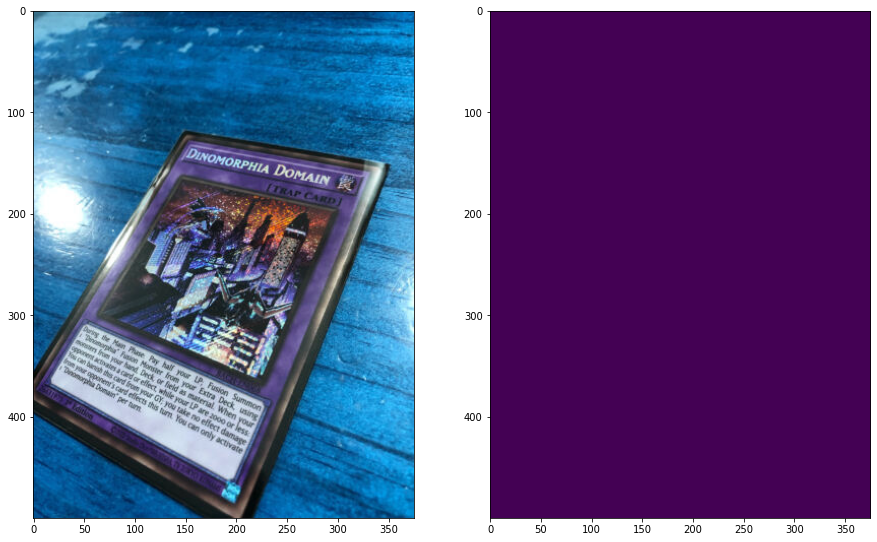

In [112]:
# Setting the plot size as 15, 15
plt.figure(figsize=(15,15))
 
# Sample Image of scikit-image package
 
# Applying Simple Linear Iterative
# Clustering on the image
# - 50 segments & compactness = 10
astronaut_segments = slic(binarized_coffee,
                          n_segments=50,
                          compactness=10)
plt.subplot(1,2,1)
 
# Plotting the original image
plt.imshow(img2)
plt.subplot(1,2,2)
 
# Converts a label image into
# an RGB color image for visualizing
# the labeled regions.
plt.imshow(label2rgb(astronaut_segments,
                     binarized_coffee,
                     kind = 'avg'))

In [115]:
corners = cv2.goodFeaturesToTrack(coffee)


TypeError: goodFeaturesToTrack() missing required argument 'maxCorners' (pos 2)

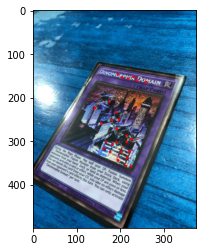

(<matplotlib.image.AxesImage at 0x7f9e3cb3cfd0>, None)

In [116]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
  
  
# read the image
img = cv2.imread('tilted_image2.jpg')
  
# convert image to gray scale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# detect corners with the goodFeaturesToTrack function.
corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10)
corners = np.int0(corners)
  
# we iterate through each corner, 
# making a circle at each point that we think is a corner.
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)
  
plt.imshow(img), plt.show()

In [120]:
import numpy as np
import cv2

img = cv2.imread('tilted_image.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)

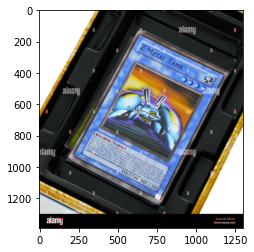

In [121]:
for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img,(x,y),3,255,-1)
    
plt.imshow(img)

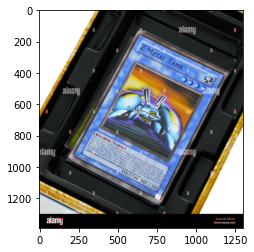

In [122]:
plt.imshow(img)

In [123]:
hull = cv2.convexHull(img, returnPoints = False)


error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/convhull.cpp:137: error: (-215:Assertion failed) total >= 0 && (depth == CV_32F || depth == CV_32S) in function 'convexHull'


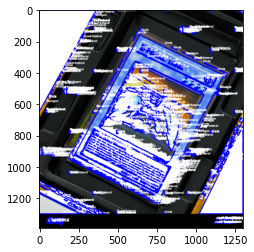

In [130]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
  
# reading image
img = cv2.imread('tilted_image.jpg')
  
# converting image into grayscale image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  
# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
  
# using a findContours() function
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
i = 0
  
# list for storing names of shapes
for contour in contours:
  
    # here we are ignoring first counter because 
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue
  
    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)
      
    # using drawContours() function
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
  
    # finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
  
    # putting shape name at center of each shape
    if len(approx) == 3:
        cv2.putText(img, 'Triangle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 4:
        cv2.putText(img, 'Quadrilateral', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 5:
        cv2.putText(img, 'Pentagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 6:
        cv2.putText(img, 'Hexagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    else:
        cv2.putText(img, 'circle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
# displaying the image after drawing contours
plt.imshow(img)


In [169]:
# USAGE
# python find_screen.py --query queries/query_marowak.jpg

# import the necessary packages
from skimage import exposure
import numpy as np
import argparse
import imutils
import cv2
from time import time
begin = time()
from support import predictScript
import os

saveWarp = True

# construct the argument parser and parse the arguments
#imagePath ='./queries/tdms_2.jpg'

#imagePath = 'queries/sarma.jpeg'
#imagePath ='./queries/bewd_0.jpg'
#imagePath ='./queries/fhd_0.jpg'
imagePath ='./queries/tdm_1.jpg'
#imagePath ='./queries/tw_1.jpg'

assert os.path.exists(imagePath)

useCam = False

resizeHeight = 300
print('Initalize predictScript: ', time()-begin,'s')
print('Starting script')


def takeCameraPic():
    cam = cv2.VideoCapture(1) # index 1 to access our usb camera
    #cam.set(cv2.CAP_PROP_AUTOFOCUS,0)
    img_counter = 0
    i = 0
    while True:
        ret, frame = cam.read()
        if not ret:
            print("failed to grab frame")
            break

        
        scale_percent = 100 # percent of original size

        width = int(frame.shape[1] * scale_percent / 100)
        height = int(frame.shape[0] * scale_percent / 100)
        dim = (width, height)

        # resize image
        frameShow = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)

        cv2.imshow("Take picture of card", frameShow)


        k = cv2.waitKey(1)
        if k%256 == 27:
            # ESC pressed
            print("Escape hit, closing...")
            break
        elif k%256 == 32:
            # SPACE pressed
            cam.release()
            cv2.destroyAllWindows()
            '''
            img_name = "opencv_frame_{}.png".format(img_counter)
            cv2.imwrite(img_name, frame)
            print("{} written!".format(img_name))
            img_counter += 1
            '''
            return frame

    cam.release()
    cv2.destroyAllWindows()
    return None





def predictCard(useCamera=True):
    # load the query image, compute the ratio of the old height
    # to the new height, clone it, and resize it
    
    image = None
    if useCamera:
        image = takeCameraPic()
    
    if image is None:
        print('Loading image from a preset path!')
        assert os.path.exists(imagePath), imagePath
        image = cv2.imread(imagePath)
    begin = time()


    ratio = image.shape[0] / 300.0
    orig = image.copy()
    image = imutils.resize(image, height = resizeHeight)

    # convert the image to grayscale, blur it, and find edges
    # in the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, 11, 17, 17)
    #gray = cv2.equalizeHist(gray)
    edged = cv2.Canny(gray, 30, 200)
    #edged = cv2.Canny(gray, 0, 200)
    #edged = cv2.Canny(gray, 130, 200)
    ret,edged = cv2.threshold(edged,127,255,cv2.THRESH_BINARY)
    kernel = np.ones((5,5),np.uint8)
    edged = cv2.dilate(edged,kernel,iterations = 3)
    edged = cv2.erode(edged,kernel,iterations = 3)
    '''
    cv2.imshow('d',edged)
    cv2.waitKey(0)
    '''
    # find contours in the edged image, keep only the largest
    # ones, and initialize our screen contour
    cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
    screenCnt = None

    #cv2.imshow('tmp',edged)
    #cv2.imshow('gray',gray)
    #cv2.waitKey(0)

    screenCntList = []

    # loop over our contours
    for c in cnts:
            # approximate the contour
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.015 * peri, True)

            # if our approximated contour has four points, then
            # we can assume that we have found our screen
            if len(approx) == 4:
                    print('Approx 4')
                    #screenCnt = approx
                    screenCntList.append(approx)
                    break

    print('Image preprocessing time: ', time()-begin,'s')

    for i,screenCnt in enumerate(screenCntList):
        # now that we have our screen contour, we need to determine
        # the top-left, top-right, bottom-right, and bottom-left
        # points so that we can later warp the image -- we'll start
        # by reshaping our contour to be our finals and initializing
        # our output rectangle in top-left, top-right, bottom-right,
        # and bottom-left order
        pts = screenCnt.reshape(4, 2)
        rect = np.zeros((4, 2), dtype = "float32")

        # the top-left point has the smallest sum whereas the
        # bottom-right has the largest sum
        s = pts.sum(axis = 1)
        rect[0] = pts[np.argmin(s)]
        rect[2] = pts[np.argmax(s)]

        # compute the difference between the points -- the top-right
        # will have the minumum difference and the bottom-left will
        # have the maximum difference
        diff = np.diff(pts, axis = 1)
        rect[1] = pts[np.argmin(diff)]
        rect[3] = pts[np.argmax(diff)]

        # multiply the rectangle by the original ratio
        rect *= ratio

        # now that we have our rectangle of points, let's compute
        # the width of our new image
        (tl, tr, br, bl) = rect
        widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
        widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))

        # ...and now for the height of our new image
        heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
        heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))

        # take the maximum of the width and height values to reach
        # our final dimensions
        maxWidth = max(int(widthA), int(widthB))
        maxHeight = max(int(heightA), int(heightB))

        # construct our destination points which will be used to
        # map the screen to a top-down, "birds eye" view
        dst = np.array([
                [0, 0],
                [maxWidth - 1, 0],
                [maxWidth - 1, maxHeight - 1],
                [0, maxHeight - 1]], dtype = "float32")

        # calculate the perspective transform matrix and warp
        # the perspective to grab the screen
        M = cv2.getPerspectiveTransform(rect, dst)
        warp = cv2.warpPerspective(orig, M, (maxWidth, maxHeight))

        # convert the warped image to grayscale and then adjust
        # the intensity of the pixels to have minimum and maximum
        # values of 0 and 255, respectively
        warp = cv2.cvtColor(warp, cv2.COLOR_BGR2GRAY)
        #warp = exposure.rescale_intensity(warp, out_range = (0, 255))
        #cv2.imshow('warp', warp)
        #cv2.waitKey(0)

        # the pokemon we want to identify will be in the top-right
        # corner of the warped image -- let's crop this region out
        (h, w) = warp.shape
        (dX, dY) = (int(w * 0.4), int(h * 0.45))
        crop = warp[10:dY, w - dX:w - 10]

        # save the cropped image to file
        warpSavePath = 'warp_' + str(i) +'.png'
        #cv2.imwrite("cropped.png", crop)
        #cv2.imwrite(warpSavePath,imutils.resize(warp, height = 300))

        warpImg = imutils.resize(warp, height = 300)
        # show our images
        print(warpImg.dtype)
        print(warpImg.shape)
        #print(type(warpImg))
        #inputWarpImg = warpImg.astype(np.uint8)
        inputWarpImg = warpImg
        orb = cv2.ORB_create()

        if saveWarp:
            cv2.imwrite(warpSavePath, inputWarpImg)
        #inputWarpImg = cv2.imread(warpSavePath,0)
        '''
        cv2.imshow('test',inputWarpImg)
        cv2.waitKey(0)
        '''
        #cv2.imshow('inputWarpImg',inputWarpImg)
        prediction = predictScript.predictCard(inputWarpImg ,orb)

        # Now we are just printing information on the card image
        resStr = '-'.join(prediction.split('-')[:-2])


        newHeight = 1000
        orig = imutils.resize(orig, height = newHeight)

        screenCnt = (screenCnt*(newHeight/resizeHeight)).astype(int)
        x0,y0 = screenCnt[0][0]
        x1,y1 = screenCnt[1][0]
        x2,y2 = screenCnt[2][0]
        x3,y3 = screenCnt[3][0]

       

        lineColor = (255,0,0)
        #lineColor = (0,255,0)

        cv2.line(orig, (x0,y0),(x1,y1), lineColor,thickness=8,lineType=8)
        cv2.line(orig, (x1,y1),(x2,y2), lineColor,thickness=8,lineType=8)
        cv2.line(orig, (x2,y2),(x3,y3), lineColor,thickness=8,lineType=8)
        cv2.line(orig, (x3,y3),(x0,y0), lineColor,thickness=8,lineType=8)


        res = cv2.putText(orig, resStr, (x1, y1-30) , cv2.FONT_HERSHEY_SIMPLEX , 1, (0, 255, 0) , 2, cv2.LINE_AA) 
        #res = cv2.putText(orig, resStr, (x0, y0-30) , cv2.FONT_HERSHEY_SIMPLEX , 1, (0, 255, 0) , 2, cv2.LINE_AA) 


        cv2.drawContours(orig,screenCnt, -1,(0,255,0),3)
        #cv2.drawContours(orig,screenCnt, -1,(0,0,255),3)
        cv2.imwrite('tmp.png',res)

        cv2.imshow("image", orig)
        #cv2.imshow("edge", edged)
        cv2.imshow("warp", warpImg)
        #cv2.imshow("crop", imutils.resize(crop, height = 300))
        cv2.waitKey(0)

    return        


predictCard(useCam)

ModuleNotFoundError: No module named 'support'

In [175]:
import os
totalDir = 0
for base, dirs, files in os.walk('regular'):
    # print('Searching in : ',base)
    # for directories in dirs:
    # for Files in files:
    #     totalFiles += 1
print(totalDir)

0


In [176]:
total_files

0

In [168]:
from time import time
resizeHeight = 300

predictCard('tilted_image2.jpg')

Loading image from a preset path!
[[[ 74   0]]

 [[  0 127]]

 [[ 11 299]]

 [[173 280]]

 [[219 195]]

 [[209 280]]

 [[268 299]]

 [[226 267]]

 [[279  49]]

 [[255  82]]

 [[138  25]]

 [[ 57 125]]

 [[113   4]]

 [[ 71  53]]]
[[[ 44 219]]

 [[ 58 218]]

 [[153 267]]

 [[153 279]]

 [[127 280]]

 [[ 76 249]]

 [[ 46 239]]]
[[[249 131]]

 [[260 147]]

 [[260 159]]

 [[248 176]]

 [[244 192]]

 [[213 192]]

 [[212 178]]

 [[221 161]]

 [[226 160]]

 [[226 151]]

 [[236 132]]]
[[[140  85]]

 [[154  84]]

 [[175  94]]

 [[177 100]]

 [[187 100]]

 [[214 113]]

 [[216 127]]

 [[211 133]]

 [[199 133]]

 [[176 120]]

 [[173 109]]

 [[160 109]]

 [[141  98]]]
[[[ 50 115]]

 [[ 51 128]]

 [[ 30 166]]

 [[ 11 165]]

 [[ 10 151]]

 [[ 29 116]]]
[[[ 23 188]]

 [[ 38 190]]

 [[ 37 208]]

 [[ 41 209]]

 [[ 40 230]]

 [[ 28 230]]

 [[ 14 221]]

 [[ 14 208]]

 [[ 17 202]]

 [[ 22 200]]]
[[[130 198]]

 [[142 198]]

 [[160 208]]

 [[159 231]]

 [[147 231]]

 [[142 226]]

 [[127 222]]]
[[[ 87 181]]

